# Import and Preprocess NBA Data

- Import advanced individual statistics from all NBA teams from 2009-2019
- Import advanced team statistics from all NBA teams from 2009-2019
------------------------------------------
- Identify which players will comprise the data for each team
- Identify Win Percentage for each team and use as regression metric

In [11]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import player stats datasheet and visualize individual sheet names

player_stats = pd.ExcelFile('NBA_AdvancedStats.xlsx')
print(player_stats.sheet_names)

['09_10', '10_11', '11_12', '12_13', '13_14', '14_15', '15_16', '16_17', '17_18', '18_19']


In [3]:
# Create individual dataframe for each sheet adding a column to see year

df_09_10 = pd.read_excel(player_stats, '09_10')
year = ['09_10']*df_09_10.shape[0]
df_09_10['Year'] = year

df_10_11 = pd.read_excel(player_stats, '10_11')
year = ['10_11']*df_10_11.shape[0]
df_10_11['Year'] = year

df_11_12 = pd.read_excel(player_stats, '11_12')
year = ['11_12']*df_11_12.shape[0]
df_11_12['Year'] = year

df_12_13 = pd.read_excel(player_stats, '12_13')
year = ['12_13']*df_12_13.shape[0]
df_12_13['Year'] = year

df_13_14 = pd.read_excel(player_stats, '13_14')
year = ['13_14']*df_13_14.shape[0]
df_13_14['Year'] = year

df_14_15 = pd.read_excel(player_stats, '14_15')
year = ['14_15']*df_14_15.shape[0]
df_14_15['Year'] = year

df_15_16 = pd.read_excel(player_stats, '15_16')
year = ['15_16']*df_15_16.shape[0]
df_15_16['Year'] = year

df_16_17 = pd.read_excel(player_stats, '16_17')
year = ['16_17']*df_16_17.shape[0]
df_16_17['Year'] = year

df_17_18 = pd.read_excel(player_stats, '17_18')
year = ['17_18']*df_17_18.shape[0]
df_17_18['Year'] = year

df_18_19 = pd.read_excel(player_stats, '18_19')
year = ['18_19']*df_18_19.shape[0]
df_18_19['Year'] = year

In [4]:
# Import team records and visualize individual sheet names

team_records = pd.ExcelFile('NBA_Team_Stats_09-20.xlsx')
print(team_records.sheet_names)

['19-20', '18-19', '17-18', '16-17', '15-16', '14-15', '13-14', '12-13', '11-12', '10-11', '09-10']


In [5]:
# Create individual dataframe for each sheet adding a column to see year

record_09_10 = pd.read_excel(team_records, '09-10') 
year = ['09_10']*record_09_10.shape[0]
record_09_10['Year'] = year

record_10_11 = pd.read_excel(team_records, '10-11') 
year = ['10_11']*record_10_11.shape[0]
record_10_11['Year'] = year

record_11_12 = pd.read_excel(team_records, '11-12') 
year = ['11_12']*record_11_12.shape[0]
record_11_12['Year'] = year

record_12_13 = pd.read_excel(team_records, '12-13')
year = ['12_13']*record_12_13.shape[0]
record_12_13['Year'] = year

record_13_14 = pd.read_excel(team_records, '13-14') 
year = ['13_14']*record_13_14.shape[0]
record_13_14['Year'] = year

record_14_15 = pd.read_excel(team_records, '14-15')
year = ['14_15']*record_14_15.shape[0]
record_14_15['Year'] = year

record_15_16 = pd.read_excel(team_records, '15-16') 
year = ['15_16']*record_15_16.shape[0]
record_15_16['Year'] = year

record_16_17 = pd.read_excel(team_records, '16-17') 
year = ['16_17']*record_16_17.shape[0]
record_16_17['Year'] = year

record_17_18 = pd.read_excel(team_records, '17-18') 
year = ['17_18']*record_17_18.shape[0]
record_17_18['Year'] = year

record_18_19 = pd.read_excel(team_records, '18-19') 
year = ['18_19']*record_18_19.shape[0]
record_18_19['Year'] = year

In [6]:
# Dictionary to convert team names to team abbreviations when combining dataframes

convert = {'Atlanta Hawks': 'ATL',
 'Boston Celtics': 'BOS',
 'Brooklyn Nets': 'BRK',
 'Chicago Bulls': 'CHI',
 'Charlotte Hornets': 'CHA',
 'Charlotte Bobcats': 'CHO',
 'Cleveland Cavaliers': 'CLE',
 'Dallas Mavericks': 'DAL',
 'Denver Nuggets': 'DEN',
 'Detroit Pistons': 'DET',
 'Golden State Warriors': 'GSW',
 'Houston Rockets': 'HOU',
 'Indiana Pacers': 'IND',
 'Los Angeles Clippers': 'LAC',
 'Los Angeles Lakers': 'LAL',
 'Memphis Grizzlies': 'MEM',
 'Miami Heat': 'MIA',
 'Milwaukee Bucks': 'MIL',
 'Minnesota Timberwolves': 'MIN',
 'New Orleans Hornets': 'NOH',
 'New Orleans Pelicans': 'NOP',   
 'New York Knicks': 'NYK',
 'New Jersey Nets': 'NJN',
 'Oklahoma City Thunder': 'OKC',
 'Orlando Magic': 'ORL',
 'Philadelphia 76ers': 'PHI',
 'Phoenix Suns': 'PHO',
 'Portland Trail Blazers': 'POR',
 'Sacramento Kings': 'SAC',
 'San Antonio Spurs': 'SAS',
 'Toronto Raptors': 'TOR',
 'Utah Jazz': 'UTA',
 'Washington Wizards': 'WAS'}

In [7]:
# Function to reshape dataframe containing individual stats. Based on previous results, the two players on
# each team with the highest VORP can explain a majority of a teams success. Therefore, we isolate the top two
# players per team and average their numeric statistics. This creates an statistical aggregate of a team's
# "superstars". In addition, this provides one row of statistics that can define a teams season. Also, sort these
# stats based on team alphabetical order, to help add win percentage in the following cells.

def organize_individual_stats(df):

    cols = df.columns
    new_DF = np.empty(shape=(60,28),dtype='object') 
    teams = sorted(df.Tm.unique())

    for i in range(0,30):
        index_team = (df.Tm == teams[i]) 
        df_team = df.loc[index_team,:]
        df_sorted = df_team.sort_values(by=['VORP'],ascending = False)
        new_DF[2*i:2*i+2,:] = df_sorted.iloc[:2,:]
        
    DF = pd.DataFrame(new_DF)
    DF.columns = cols
    
    cols_hash = {}
    for i in range(len(cols)):
        cols_hash[i] = cols[i]

    DF = DF.sort_values('Tm')
    DF = DF.rename(cols_hash, axis='columns')
    
    temp = DF.drop(['Rk','Player','Pos','Age','G','Year'], axis=1)
    return temp.groupby('Tm').sum()/2

In [8]:
# Return win percentage given a string showing team record

def win_percentage(s):
    s = s.split('-')
    return int(s[0]) / (int(s[0]) + int(s[1]))

In [9]:
# Given team statistics, isolate team record and return win percentage. Then, convert team naes to their
# abbreviation and sort in alphabetical to match the ordering of the individual stats dataframe. Return the column
# of team win percentages sorted by team name, which can be appended to the individual stats dataframe.

def organize_team_stats(df):
    
    df['Team Abr'] = df['Team'].apply(lambda x: convert[x])
    df['Win Per'] = df['Overall'].apply(lambda x: win_percentage(x))

    sorted_team_names = df.sort_values('Team Abr')['Win Per']
    col = [i for i in sorted_team_names]
    
    return col

In [10]:
organize_individual_stats_09_10 = organize_individual_stats(df_09_10)
organize_individual_stats_10_11 = organize_individual_stats(df_10_11)
organize_individual_stats_11_12 = organize_individual_stats(df_11_12)
organize_individual_stats_12_13 = organize_individual_stats(df_12_13)
organize_individual_stats_13_14 = organize_individual_stats(df_13_14)
organize_individual_stats_14_15 = organize_individual_stats(df_14_15)
organize_individual_stats_15_16 = organize_individual_stats(df_15_16)
organize_individual_stats_16_17 = organize_individual_stats(df_16_17)
organize_individual_stats_17_18 = organize_individual_stats(df_17_18)
organize_individual_stats_18_19 = organize_individual_stats(df_18_19)

In [11]:
cols_09_10 = organize_team_stats(record_09_10)
cols_10_11 = organize_team_stats(record_10_11)
cols_11_12 = organize_team_stats(record_11_12)
cols_12_13 = organize_team_stats(record_12_13)
cols_13_14 = organize_team_stats(record_13_14)
cols_14_15 = organize_team_stats(record_14_15)
cols_15_16 = organize_team_stats(record_15_16)
cols_16_17 = organize_team_stats(record_16_17)
cols_17_18 = organize_team_stats(record_17_18)
cols_18_19 = organize_team_stats(record_18_19)

In [12]:
# Add win percentage column to each dataframe

organize_individual_stats_09_10['Win Per'] = cols_09_10
organize_individual_stats_10_11['Win Per'] = cols_10_11
organize_individual_stats_11_12['Win Per'] = cols_11_12
organize_individual_stats_12_13['Win Per'] = cols_12_13
organize_individual_stats_13_14['Win Per'] = cols_13_14
organize_individual_stats_14_15['Win Per'] = cols_14_15
organize_individual_stats_15_16['Win Per'] = cols_15_16
organize_individual_stats_16_17['Win Per'] = cols_16_17
organize_individual_stats_17_18['Win Per'] = cols_17_18
organize_individual_stats_18_19['Win Per'] = cols_18_19

In [89]:
# Vertically concatenate all dataframes. Final DF has a shape of (300,22)

frames = [organize_individual_stats_09_10,organize_individual_stats_10_11,organize_individual_stats_11_12,
         organize_individual_stats_12_13,organize_individual_stats_13_14,organize_individual_stats_14_15,
         organize_individual_stats_15_16,organize_individual_stats_16_17,organize_individual_stats_17_18,
         organize_individual_stats_18_19]

DF = pd.concat(frames)
DF.shape

(300, 22)

In [14]:
DF.head()

,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Win Per
Tm,,,,,,,,,,,,,,,,,,,,,
ATL,2858.0,20.20,0.5650,0.0040,0.3705,9.30,21.55,15.35,14.70,1.75,...,19.90,5.55,4.5,10.10,0.1690,1.35,3.10,4.40,4.6,0.646341
BOS,2687.0,18.65,0.5765,0.1955,0.4055,3.15,11.95,7.70,29.40,2.55,...,22.00,4.95,4.0,8.95,0.1605,2.25,0.80,3.10,3.5,0.609756
CHA,3012.5,15.55,0.5690,0.2070,0.3835,5.70,17.55,11.75,13.95,1.55,...,18.25,3.85,5.0,8.85,0.1400,0.45,2.25,2.70,3.6,0.500000
CHI,2398.0,18.25,0.5445,0.0220,0.3335,7.75,18.15,13.00,20.55,0.95,...,22.15,3.10,3.0,6.10,0.1270,0.50,1.00,1.50,2.0,0.536585
CLE,2566.0,23.45,0.6010,0.1320,0.4405,6.95,19.45,13.50,23.95,1.95,...,23.30,8.80,4.5,13.30,0.2390,5.05,2.70,7.75,6.8,0.743902


# Exploratory Data Analysis

- Understand the correlation between all values and their relationship with win percentage
- Search for non-correlated variables
- Visualize unusual or inconsistent trends

In [2]:
import seaborn as sns

Text(0.5, 1, 'Correlation of All Team Statistics')

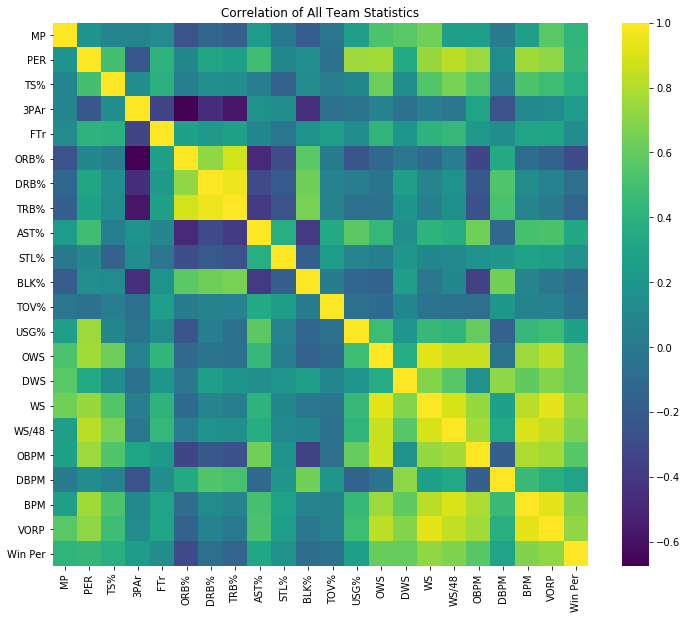

In [76]:
# View correlation between all statistics using a heatmap

plt.figure(figsize=(12,10))
sns.heatmap(DF.corr(),annot=False,cmap='viridis')
plt.title('Correlation of All Team Statistics')

In [18]:
# Isolate correlation related to win percentage and sort

DF.corr()['Win Per'].sort_values()

ORB%      -0.301012
TRB%      -0.140270
BLK%      -0.083523
DRB%      -0.069141
TOV%      -0.049068
FTr        0.140439
STL%       0.168102
3PAr       0.239260
USG%       0.271167
DBPM       0.297095
AST%       0.320758
TS%        0.373847
MP         0.416735
PER        0.436131
OBPM       0.555099
DWS        0.606448
OWS        0.611323
WS/48      0.675894
BPM        0.684293
VORP       0.722653
WS         0.723317
Win Per    1.000000
Name: Win Per, dtype: float64

Text(0.5, 0, 'Statistic')

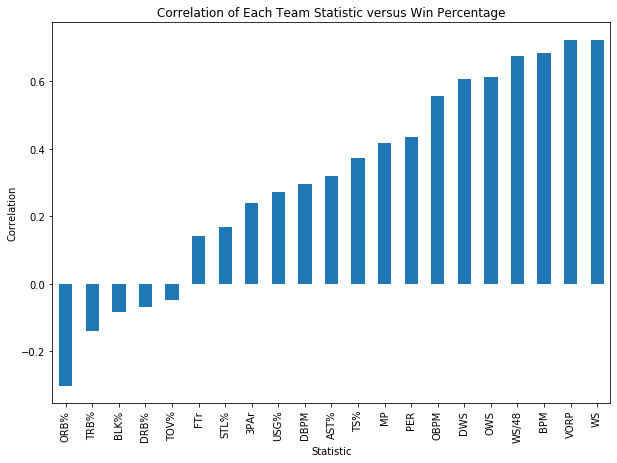

In [77]:
# Plot these correlations. It appears that VOPR and win share are highly correlated as expected. Strangly,
# offensive rebound percentage is negatively correlated. May show that teams with "superstars" that are not
# strong rebounders (guards power forwards) have higher win rates.

plt.figure(figsize=(10,7))
DF.corr()['Win Per'].sort_values().drop('Win Per').plot(kind='bar')
plt.title('Correlation of Each Team Statistic versus Win Percentage')
plt.ylabel('Correlation')
plt.xlabel('Statistic')

Text(0.5, 1.0, 'Relationship Between Win Share and VORP')

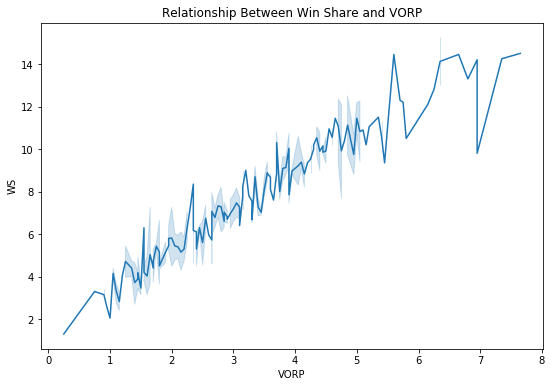

In [64]:
# VOPR and win share seem very similar in correlation to win percentage. Plot their relationship to make sure
# they are not perfectly correlated.

plt.figure(figsize = (9,6))
sns.lineplot(x = DF['VORP'], y = DF['WS'])
plt.title('Relationship Between Win Share and VORP')

Text(0.5, 1.0, 'Relationship of Minutes Played on Win Percentage while denoting Player Efficiency Rating')

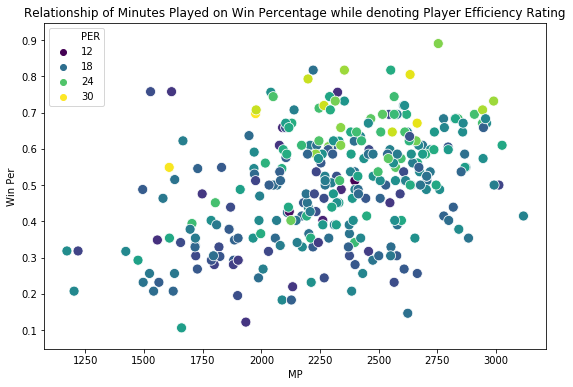

In [83]:
# One interesting stat is 'minutes played'. As expected, teams with superstars that played more time should 
# have a higher win rate. However, we can add Player Efficiency Rating (independent of minutes played) as a hue.
# It appears that PER is correlated to win percentage regardless of playing time.

plt.figure(figsize = (9,6))
sns.scatterplot(x = DF['MP'], y = DF['Win Per'], hue = DF['PER'], palette = 'viridis', s = 100)
plt.title('Relationship of Minutes Played on Win Percentage while denoting Player Efficiency Rating')

Text(0.5, 1.0, 'Relationship Between Win Share and VORP')

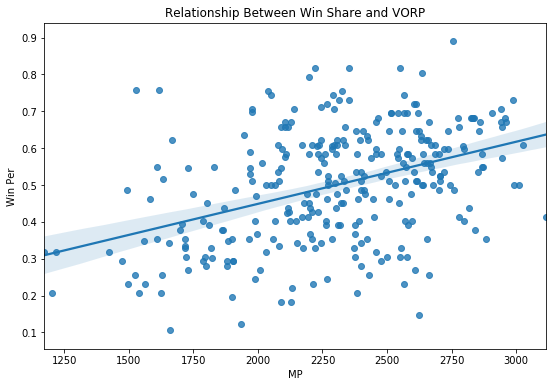

In [70]:
# Plot linear regression line to show trend of minutes played on win percentage

plt.figure(figsize = (9,6))
sns.regplot(x = 'MP', y = 'Win Per', data = DF, scatter = True)
plt.title('Linear Regression Model of Minutes Played on Win Percentage')

# Train Test Split

- Identify training data and testing data
- Create X test/train and y test/train variables using an 80/20 split
- Scale and transform variables using MinMaxScaler

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [147]:
X = DF.drop('Win Per',axis=1).values
y = DF['Win Per'].values

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [149]:
# MinMaxScaler transforms data features into a given range

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Creation

- Identify model and hyperparameters
- Train model using training and validation data

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [151]:
# Create sequential model with two hidden layers. Training data has 21 features, so model nodes will be
# multiples of 21. Use rectified linear unit as activation function. Compile using mean squared error
# because output is continuous.

model = Sequential()

model.add(Dense(42, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(21, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(21, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='mse', optimizer='adam')

In [152]:
# Pass in an early stop parameter as a callback to prevent overfitting. Monitors validation loss and stops 
# training after 40 epochs without improvement.

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=40)

In [153]:
# Fit model. Very little data, so 

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=1,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop]
          )

Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 0.0221 - val_loss: 0.0160
Epoch 2/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0184 - val_loss: 0.0111
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 0.0150 - val_loss: 0.0087
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0169 - val_loss: 0.0114
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 0.0135 - val_loss: 0.0066
Epoch 6/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0122 - val_loss: 0.0070
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 0.0121 - val_loss: 0.0065
Epoch 8/100
240/240 [==============================] - 1s 2ms/step - loss: 0.0116 - val_loss: 0.0072
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0112 - val_loss: 0.0072
Epoch 10/100
240/240 [==============================] - 0s 2ms/step - loss: 0.0109 - val_lo

# Model Evaluation

- Catalog and visualize losses
- Predict on test data
- Observe and plot evaluation metrics
---------
- Make predictions

In [154]:
losses = pd.DataFrame(model.history.history)

Text(0.5, 0, 'Epoch')

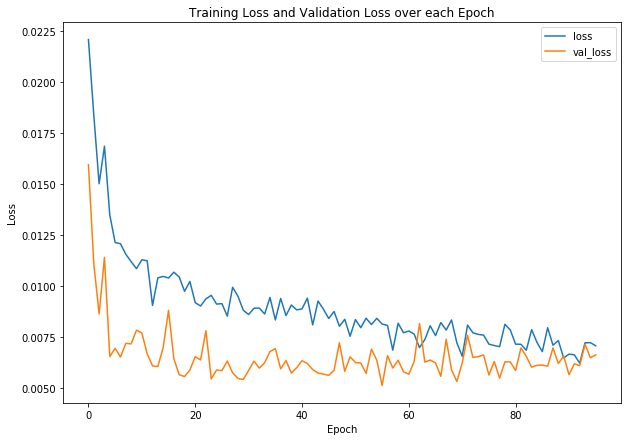

In [167]:
losses[['loss','val_loss']].plot(figsize = (10,7))
plt.title('Training Loss and Validation Loss over each Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [156]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [157]:
predictions = model.predict(X_test)

In [171]:
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print('The mean absolute error is {}\n'.format(mae))
print('The mean squared error is {}\n'.format(mse))
print('The root mean squared error is {}'.format(rmse))

The mean absolute error is 0.06006098347663048

The mean squared error is 0.006644364883407155

The root mean squared error is 0.08151297371220827


In [172]:
evs = explained_variance_score(y_test,predictions)

print('The explained variance score is {}\n'.format(evs))

The explained variance score is 0.7611007687692976



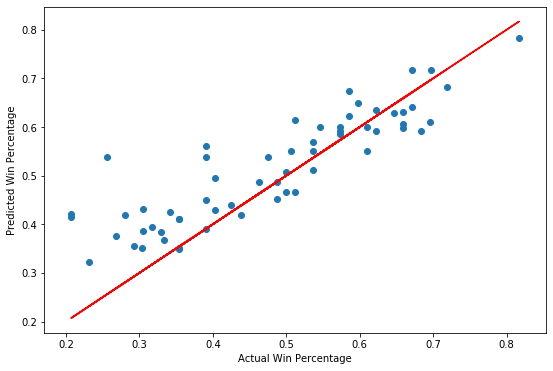

In [161]:
# Our predictions
plt.figure(figsize = (9,6))
plt.scatter(y_test,predictions)

plt.title('Predicted Win Percenteage versus Actual Win Percentage')
plt.xlabel('Actual Win Percentage')
plt.ylabel('Predicted Win Percentage')

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [162]:
errors = y_test.reshape(60, 1) - predictions

Text(0.5, 1.0, 'Distribution of Errors on Test Data')

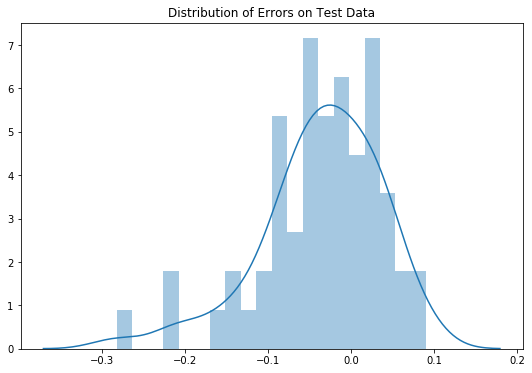

In [163]:
plt.figure(figsize = (9,6))
sns.distplot(errors, bins = 20, kde = True)
plt.title('Distribution of Errors on Test Data')